In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
pdxParkData = pd.read_csv("./data/Parks.csv")
pdxParkData.head()

,OBJECTID,PROPERTYID,NAME,ACRES,Shape_Length,Shape_Area
0,1,48,Albert Kelly Park,12.086152,1439.252170,99517.684997
1,2,49,Alberta Park,16.403797,1597.320137,135441.949786
2,3,51,April Hill Park,10.122265,1454.650781,83301.344632
3,4,52,Arbor Lodge Park,8.691468,1089.424844,71783.775744
4,5,53,Argay Park,8.928252,1172.208302,73684.911851


In [95]:
# display Name and Property Id number
pdxParkNames = pdxParkData[['NAME','PROPERTYID']]
# get the exact property name
pdxParkNames[pdxParkNames['PROPERTYID']==1385]


,NAME,PROPERTYID
154,Elizabeth Caruthers Park,1385


In [1]:
# get tree data per park.
parkTreeInventory = pd.read_csv("./data/Parks_Tree_Inventory.csv")
parkTreeInventory.head()

parkTreeInventory.info


NameError: name 'pd' is not defined

In [ ]:
# pull property id numbers and determine match
treeParks = parkTreeInventory['PropertyID']

treeProperties = treeParks.unique()

unique_properties = pd.DataFrame(treeProperties, columns=['ParkID'])
# calling to string will display all of the available park ids
# print(unique_properties.to_string())

# drops Nan in row 72
unique_properties = unique_properties.drop([72])

print(unique_properties.to_string())

type(unique_properties)



In [39]:
# get all of the park names that have been inventoried
parksInventoried = pdxParkData.merge(unique_properties,right_on='ParkID', left_on='PROPERTYID')
parksInventoried = parksInventoried.drop('PROPERTYID',axis=1)
# print(parksInventoried.to_string())

# what is Portland's largest park?

print("Portland's Largest Acreage: " + str(parksInventoried['ACRES'].max()))

print(parksInventoried[parksInventoried['ACRES'] == parksInventoried['ACRES'].max()]['NAME'])


Portland's Largest Acreage: 261.63549611
160    Springwater Corridor
Name: NAME, dtype: object


In [40]:
# pull trees by propertyID

# here is pioneer square
parkTreeInventory[parkTreeInventory['PropertyID'] == 515]

,X,Y,OBJECTID,Inventory_Date,Species,DBH,Condition,TreeHeight,CrownWidthNS,CrownWidthEW,...,Common_name,Genus_species,Functional_type,Size,Native,Edible,Nuisance,Origin,Species_factoid,PropertyID
21923,-1.365656e+07,5.703614e+06,636386,2019/09/03 00:00:00+00,CUSE,2.8,Good,13.0,4.0,4.0,...,Italian cypress,Cupressus sempervirens,CE,M,No,NaN,NaN,"Africa, Asia, Europe - Iran, Syria, Israel, Le...",Narrowest conifer tree in Portland to 3' wide....,515.0
21924,-1.365665e+07,5.703567e+06,636387,2019/09/03 00:00:00+00,STJA,1.9,Good,10.0,9.0,9.0,...,Japanese snowbell,Styrax japonicus,BD,S,No,NaN,NaN,"Asia - Japan, Korea, China",Fruit looks like an upside down golf ball sitt...,515.0
21925,-1.365664e+07,5.703579e+06,636388,2019/09/03 00:00:00+00,STJA,1.9,Good,8.0,9.0,10.0,...,Japanese snowbell,Styrax japonicus,BD,S,No,NaN,NaN,"Asia - Japan, Korea, China",Fruit looks like an upside down golf ball sitt...,515.0
21944,-1.365664e+07,5.703572e+06,636789,2019/09/03 00:00:00+00,STJA,1.9,Good,9.0,9.0,8.0,...,Japanese snowbell,Styrax japonicus,BD,S,No,NaN,NaN,"Asia - Japan, Korea, China",Fruit looks like an upside down golf ball sitt...,515.0
21945,-1.365663e+07,5.703581e+06,636790,2019/09/03 00:00:00+00,STJA,1.9,Good,7.0,12.0,8.0,...,Japanese snowbell,Styrax japonicus,BD,S,No,NaN,NaN,"Asia - Japan, Korea, China",Fruit looks like an upside down golf ball sitt...,515.0
21962,-1.365657e+07,5.703619e+06,637187,2019/09/03 00:00:00+00,CUSE,2.8,Fair,13.0,4.0,4.0,...,Italian cypress,Cupressus sempervirens,CE,M,No,NaN,NaN,"Africa, Asia, Europe - Iran, Syria, Israel, Le...",Narrowest conifer tree in Portland to 3' wide....,515.0
21963,-1.365664e+07,5.703570e+06,637188,2019/09/03 00:00:00+00,STJA,1.9,Good,9.0,9.0,9.0,...,Japanese snowbell,Styrax japonicus,BD,S,No,NaN,NaN,"Asia - Japan, Korea, China",Fruit looks like an upside down golf ball sitt...,515.0
21964,-1.365665e+07,5.703576e+06,637189,2019/09/03 00:00:00+00,STJA,1.9,Good,9.0,8.0,7.0,...,Japanese snowbell,Styrax japonicus,BD,S,No,NaN,NaN,"Asia - Japan, Korea, China",Fruit looks like an upside down golf ball sitt...,515.0
21965,-1.365664e+07,5.703584e+06,637190,2019/09/03 00:00:00+00,STJA,1.9,Good,9.0,7.0,8.0,...,Japanese snowbell,Styrax japonicus,BD,S,No,NaN,NaN,"Asia - Japan, Korea, China",Fruit looks like an upside down golf ball sitt...,515.0
21981,-1.365655e+07,5.703611e+06,637586,2019/09/03 00:00:00+00,CUSE,2.8,Good,14.0,4.0,4.0,...,Italian cypress,Cupressus sempervirens,CE,M,No,NaN,NaN,"Africa, Asia, Europe - Iran, Syria, Israel, Le...",Narrowest conifer tree in Portland to 3' wide....,515.0


In [1]:
#  all unique trees inventoried
allTrees = parkTreeInventory['Common_name'].unique()
print(allTrees)

NameError: name 'parkTreeInventory' is not defined

                                   NAME  DouglasFirCount
17                        Mt Tabor Park              696
1                         Columbia Park              557
10                       John Luby Park              547
14                         Lincoln Park              430
16                        Mt Scott Park              344
15                       Lynchwood Park              325
21                        Sellwood Park              287
12                     Laurelhurst Park              279
2                          Creston Park              270
5                          Alberta Park              242
19               North Powellhurst Park              207
22                      Washington Park              179
23                        Wilshire Park              169
13                           Lents Park              166
6                      Earl Boyles Park              152
4                     Albert Kelly Park              136
20                       Penins

Text(0.5, 1.0, 'Douglas-Fir Counts Per Park')

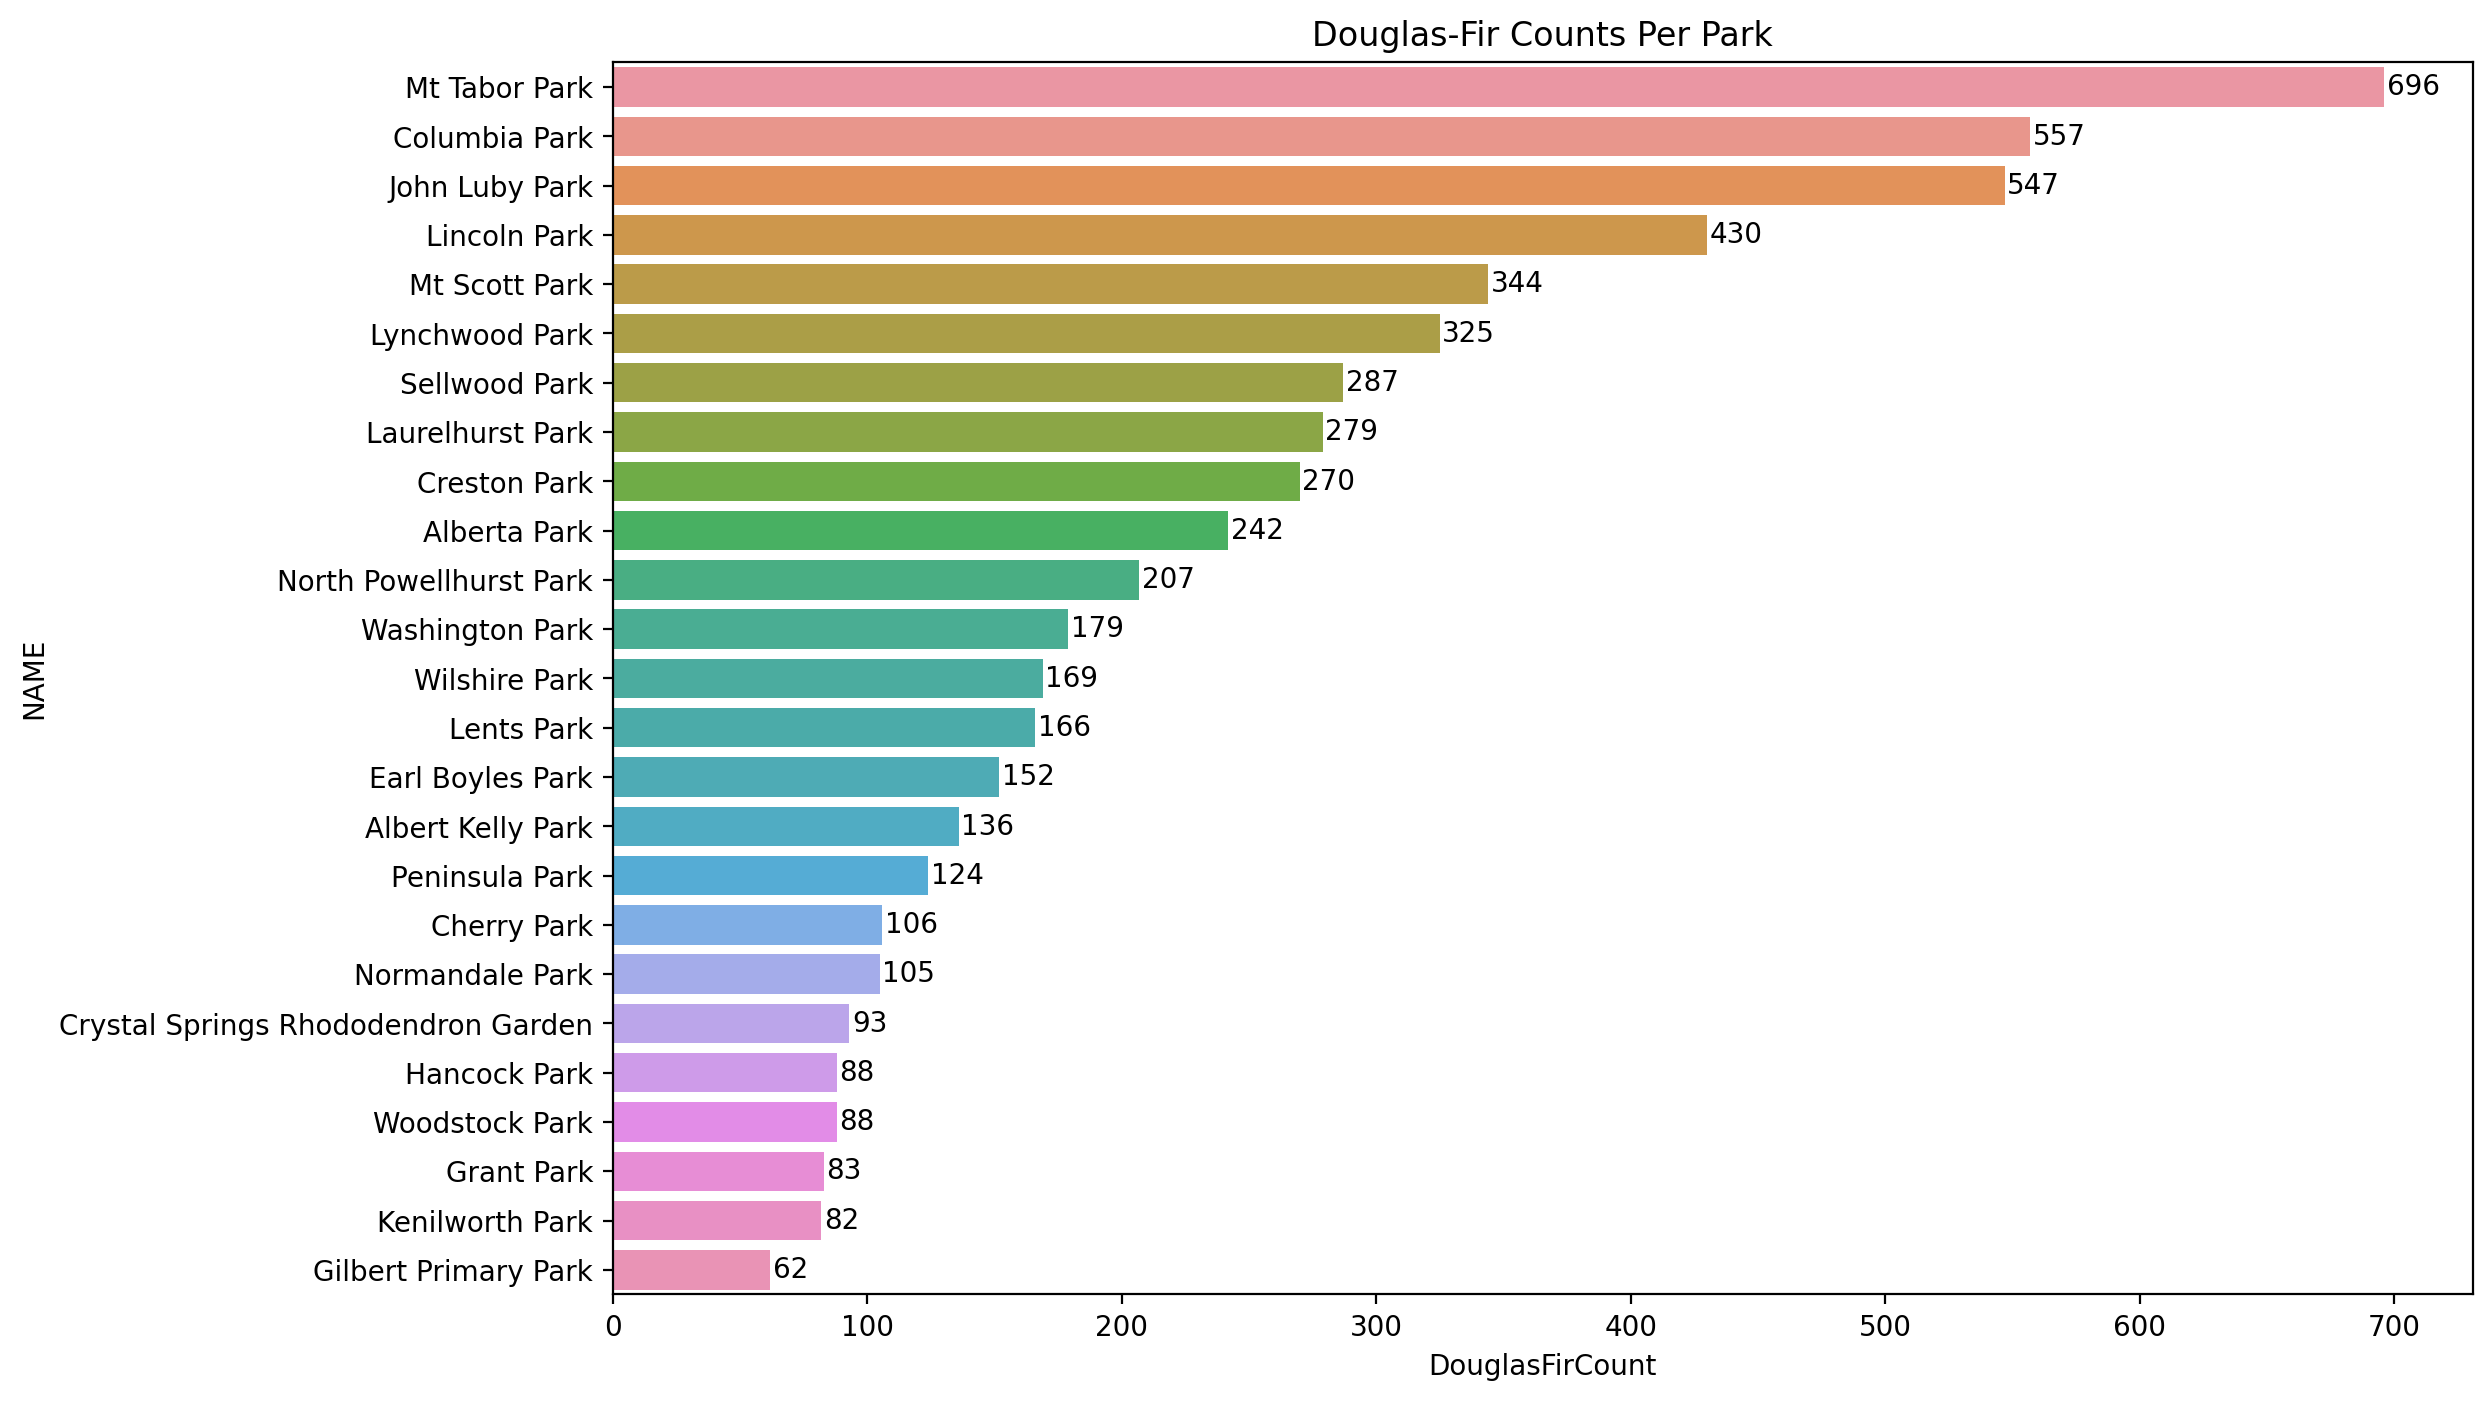

In [661]:
# Questions to Answer:

# which park has the tallest douglas-fir?
# Common_name = 'Douglas-fir'

parksWithDouglasFirs = parkTreeInventory[parkTreeInventory['Common_name'] == 'Douglas-fir']
tallestDouglasFirPark = parksWithDouglasFirs[['PropertyID','TreeHeight']].max()

# tallestPark = tallestDouglasFirPark['PropertyID']

# parkName = parksInventoried[parksInventoried['ParkID'] == tallestPark]
# print(parkName)

#which park has the largest and tallest collection of douglas-fir?

parksWithDouglasFirs = parkTreeInventory[parkTreeInventory['Common_name'] == 'Douglas-fir'][['PropertyID','TreeHeight']]
# without max this will show the largest collection of douglas-firs with the park id
parksWithDouglasFirs['PropertyID'].value_counts().max()
#  gets the grouped properties by mean value for tree heights 
parksWithTallDFirs = parksWithDouglasFirs.groupby('PropertyID').mean()
# displays park ID = 1196.0
parkName = parksInventoried[parksInventoried['ParkID'] == 1196.0]
# print(parkName)

# which of these parks that contain the tallest trees is the largest?
# get the top 25 parks with the max counts of douglas firs
# print(parksWithDouglasFirs['PropertyID'].value_counts().head(25))

largestCollectionDougFirs = parksWithDouglasFirs['PropertyID'].value_counts().head(25)


# confirm 25
len(largestCollectionDougFirs)
# this gets the parkIds for searching 
parkList = largestCollectionDougFirs.index

# this is the list of parks with the largest collection of Douglas-Firs 
largestParksWithLargestCollection = parksInventoried[parksInventoried['ParkID'].isin(parkList)].sort_values(by='ACRES',ascending=False)[:10]
largestParksWithLargestCollection[['NAME','ACRES','ParkID']]

# this is groups of douglas fir parks by id
treesPerPark = parkTreeInventory[parkTreeInventory['Common_name'] == 'Douglas-fir'].groupby('PropertyID').size()
treesPerPark = treesPerPark[treesPerPark.index.isin(parkList)]

# reset_index sets the new count to a column within the Series and give it a name 'DouglasFirCount'
treesPerPark = treesPerPark.reset_index(name='DouglasFirCount')

# Merge with parksInventoried to get park names
merged_df = pd.merge(treesPerPark, parksInventoried, left_on='PropertyID', right_on='ParkID', how='left')

# Select relevant columns
parkNamesDouglasFirCounts = merged_df[['NAME','DouglasFirCount']].sort_values(by='DouglasFirCount', ascending=False)      
print(parkNamesDouglasFirCounts[['NAME','DouglasFirCount']])

plt.figure(figsize=(12,8),dpi=200)
sns.barplot(x=parkNamesDouglasFirCounts['DouglasFirCount'],y=parkNamesDouglasFirCounts['NAME'])
for index, value in enumerate(parkNamesDouglasFirCounts['DouglasFirCount']):
    plt.text(value + 1, index, str(value), ha='left', va='center')

plt.title('Douglas-Fir Counts Per Park')



                                   NAME  TreeHeight
0                     Albert Kelly Park       143.0
1                          Alberta Park       143.0
2                         Columbia Park       174.0
3                          Creston Park       158.0
4   Crystal Springs Rhododendron Garden       153.0
5                            Grant Park       144.0
6                          Hancock Park       148.0
7                        John Luby Park       151.0
8                       Kenilworth Park       153.0
9                            Lents Park       150.0
10                       Lynchwood Park       168.0
11                        Mt Scott Park       168.0
12                        Mt Tabor Park       190.0
13                      Normandale Park       130.0
14               North Powellhurst Park       150.0
15                       Peninsula Park       140.0
16                        Sellwood Park       184.0
17                        Wilshire Park       144.0
18          

Text(0.5, 1.0, 'Tallest Douglas-Fir in Park')

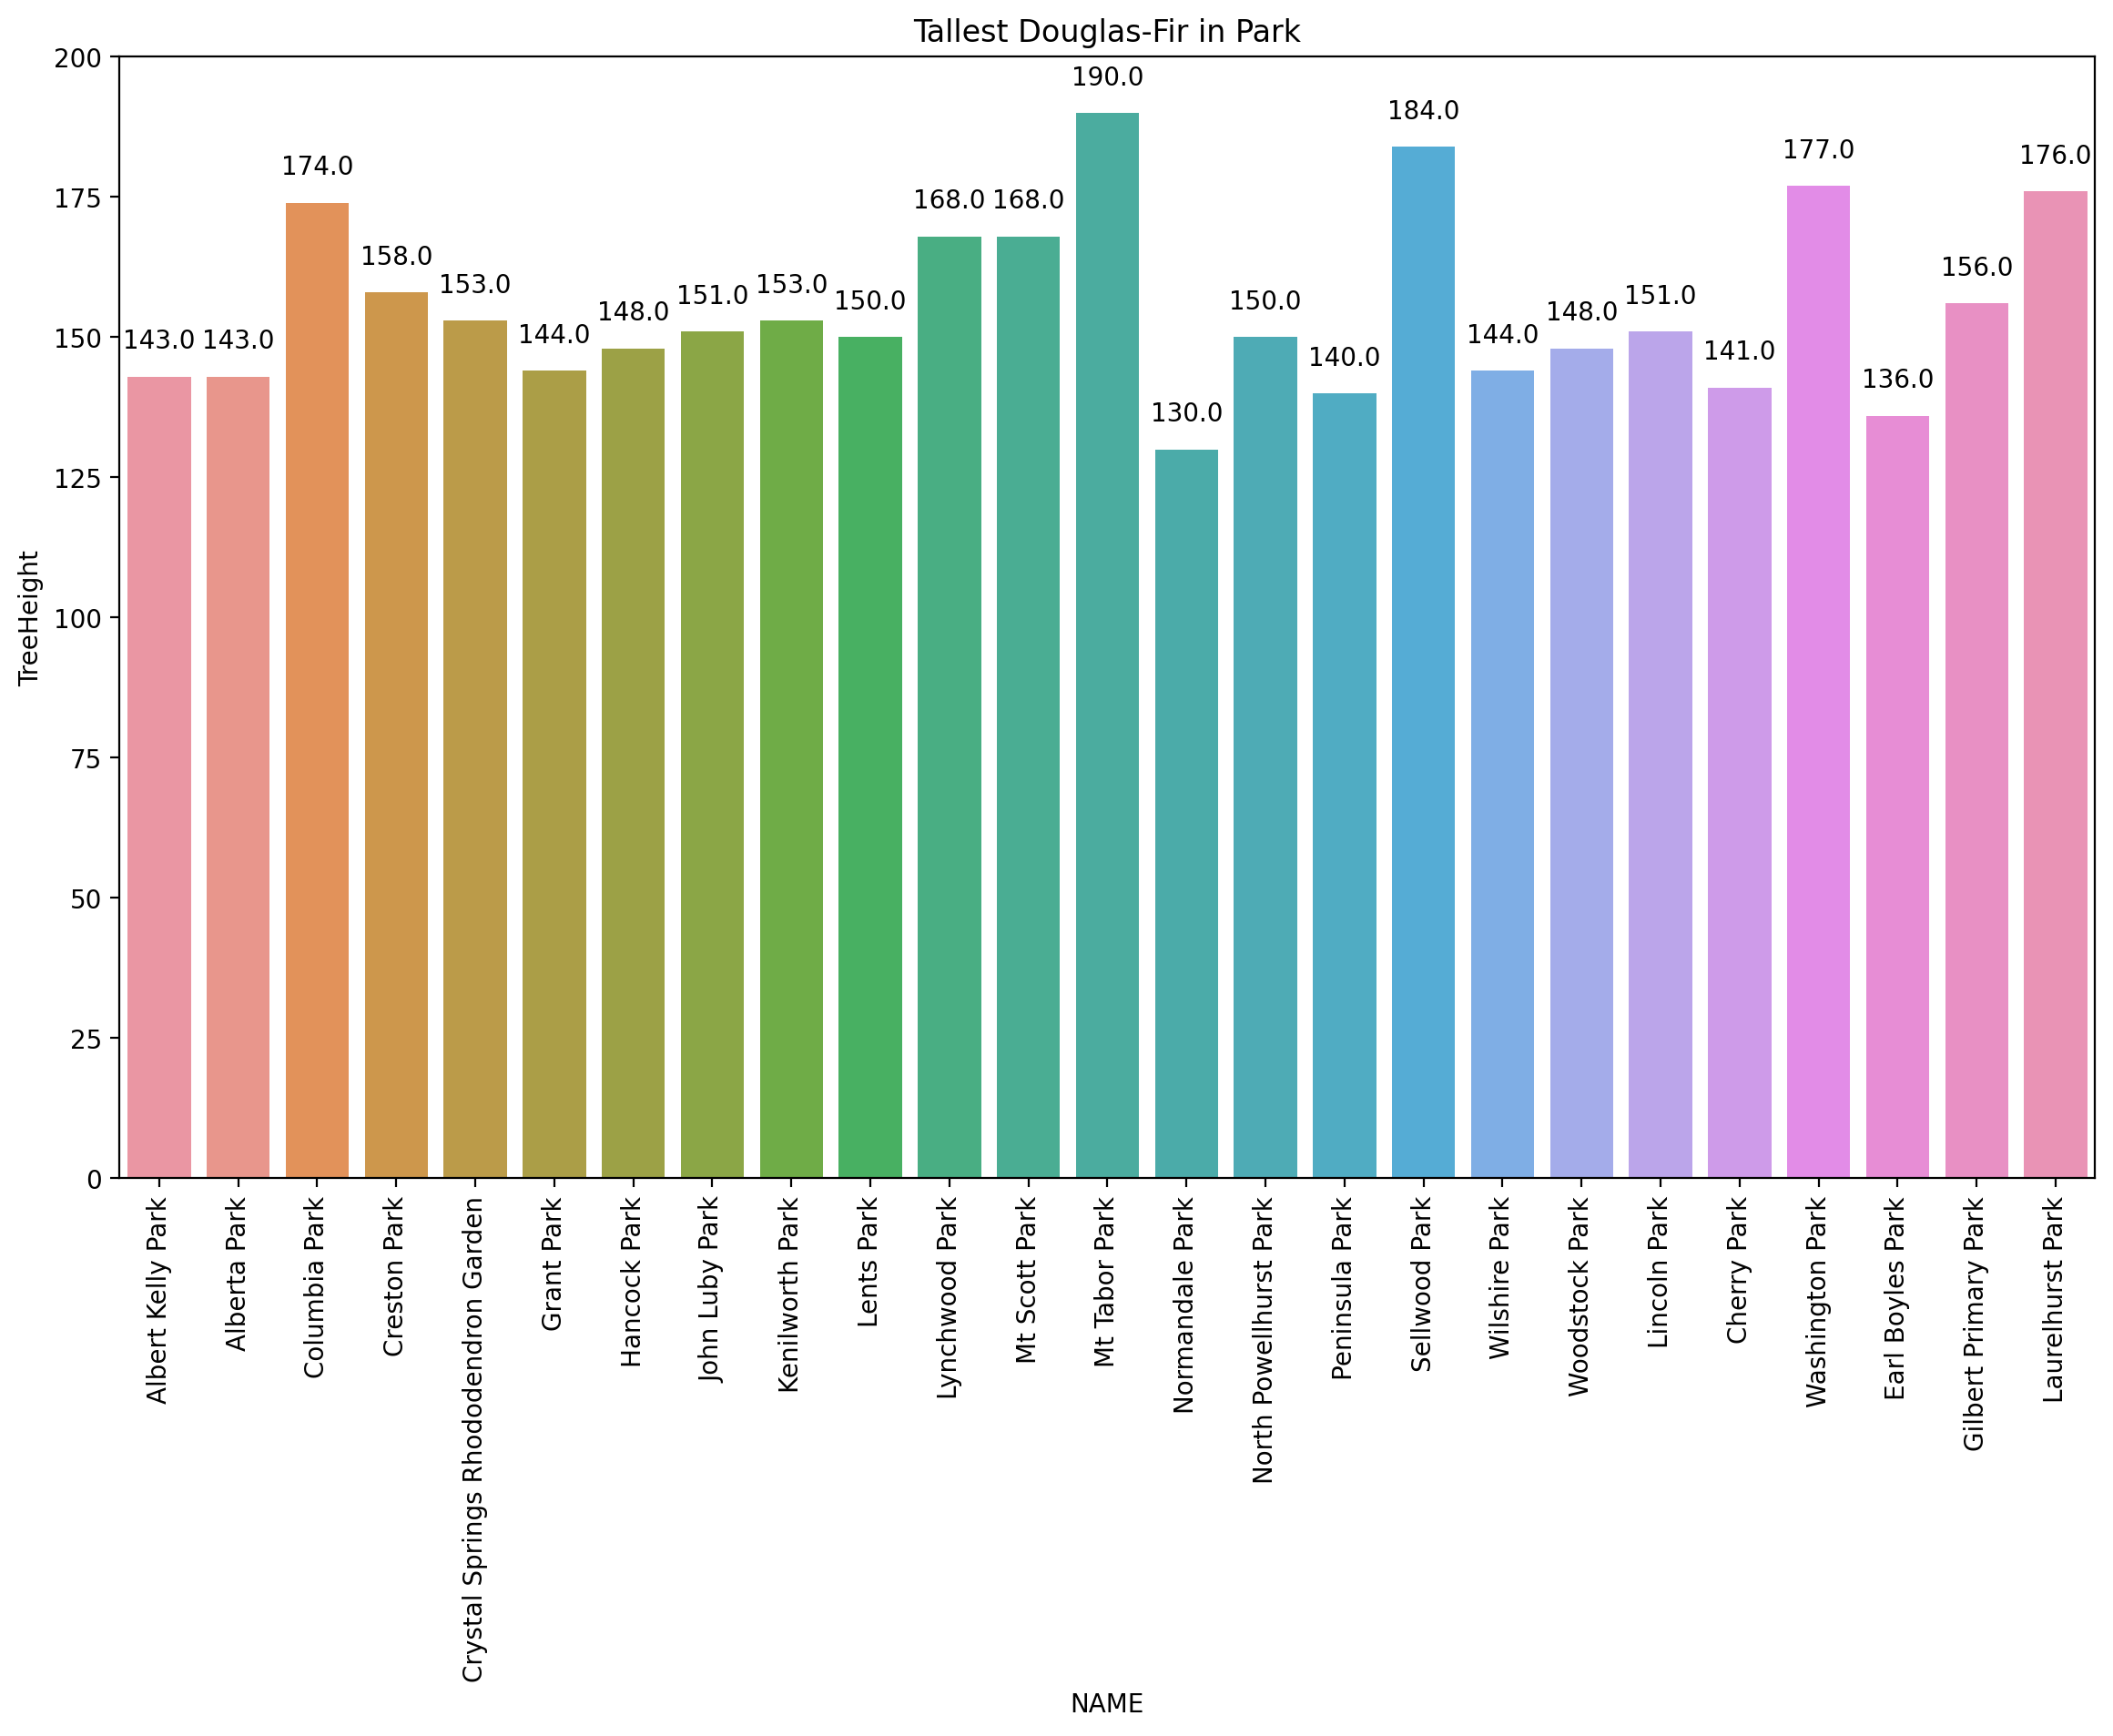

In [653]:
# per each of these parks what is the largest tree height?
idx = parkTreeInventory[parkTreeInventory['Common_name'] == 'Douglas-fir'][['PropertyID','TreeHeight']].groupby('PropertyID')['TreeHeight'].idxmax()

tallestTreesPerPark = parkTreeInventory.loc[idx]
tallestTreesPerPark = tallestTreesPerPark[tallestTreesPerPark['PropertyID'].isin(parkList)][['TreeHeight','PropertyID']]
# print(tallestTreesPerPark)

parkNames = parksInventoried[parksInventoried['ParkID'].isin(tallestTreesPerPark['PropertyID'])][['NAME','ParkID']]
# parkNames

parkNamesTreeHeights = pd.merge(parkNames, tallestTreesPerPark, left_on='ParkID', right_on='PropertyID')
parkNamesTreeHeights = parkNamesTreeHeights.drop(['ParkID','PropertyID'], axis=1)
print(parkNamesTreeHeights)

#  display the data of max tree heights per park

plt.figure(figsize=(14,8),dpi=200)
sns.barplot(x=parkNamesTreeHeights['NAME'],y=parkNamesTreeHeights['TreeHeight'])
plt.xticks(rotation=90)
# iterates over each bar from the TreeHeight index and adds the value to the bar 
# with a (Horizontal Alignment) = Center, and (Vertical Alginment) = Bottom
for index, value in enumerate(parkNamesTreeHeights['TreeHeight']):
    plt.text(index, value + 4, str(value), ha='center', va='bottom')
plt.ylim(0, 200)
plt.title('Tallest Douglas-Fir in Park')


In [ ]:

# Further Analysis:

# which park has the most big leaf maples?

    # where is the tallest?      

# where are the most ponderosa pines?

# are there any parks with western juniper trees?

# which park has the tallest white oaks?

# which park has the most rhododendrons?

# which park has the most magnolias?

# which park has the most dogwoods?

# which park has the most witchhazel?

# which park has the most ginko trees?